## Classification Models for Breast Cancer dataset

This problem could have been modelled with multiple different ways. For simplicity, I have not performed any feature selection and used all 30 independent variables to train 3 models - Decision Tree, Logistic Regression and k-Nearest Neighbor.

### Loading packages and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, cohen_kappa_score, f1_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
col_names = ['id', 'diagnosis', 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
             'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
             'concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
             'perimeter_worst', 'area_worst','smoothness_worst','compactness_worst','concavity_worst',
             'concave_points_worst','symmetry_worst','fractal_dimension_worst']

data = pd.read_csv('wdbc.data', sep=',', header=None, names=col_names)

### Data summary

In [4]:
n_samples, n_features = data.shape
print ('The dimensions of the data set are', n_samples, 'by', n_features)

The dimensions of the data set are 569 by 32


In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Preprocessing and Normalization

Although normalization is not important for classification techniques like Decision Tree, we would need to normalize our data for k-NN and Logistic Regression.

In [6]:
# Setting Malign as 1 and benign as 0
data['diagnosis'] = pd.Series(np.where(data['diagnosis'] == 'M', 1, 0))

# Splitting data into dependent and independent variables
data_X = data.iloc[:, 2:]
data_y = data.iloc[:, 1]

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.3, random_state = 52, stratify = data_y)

# Normalizing data using standardization process
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model 1: Decision-Tree Classifier
I chose Information Gain as the only criteria for training my decision trees and did not model for Gini Index. Although, we can do that as well but it would just increase the complexity of the analysis.

The final parameters for the following model were given after performing parameter tuning. (Described later)

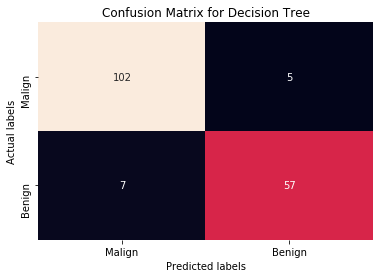

In [7]:
clf_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=17)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

# Performance Measures - 

# I have calculated all the scores here and have printed them at the end of the analysis as a comparison.

accuracy_dt = accuracy_score(y_test, y_pred_tree) # accuracy

precision_dt = precision_score(y_test, y_pred_tree, average="macro") # precision

recall_dt = recall_score(y_test, y_pred_tree, average="macro") # recall

f1_dt = f1_score(y_test, y_pred_tree, average="macro") # f1

kappa_dt = cohen_kappa_score(y_test, y_pred_tree) # kappa

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred_tree)

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g', cbar = False); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix for Decision Tree'); 
ax.xaxis.set_ticklabels(['Malign', 'Benign']); ax.yaxis.set_ticklabels(['Malign', 'Benign']);

The above confusion matrix shows good results, as almost all of the classification are in the major diagonal. This means that Type 1 and Type 2 errors are low.

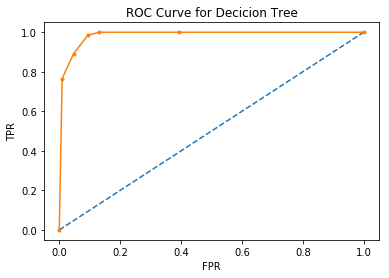

AUC: 0.985


In [8]:
# ROC Curve

probs = clf_tree.predict_proba(X_test) # predicting probabilities
probs = probs[:, 1] # keeping probabilities for the positive outcome only
auc = roc_auc_score(y_test, probs) # calculating AUC
fpr, tpr, thresholds = roc_curve(y_test, probs) # calculating roc curve
plt.plot([0, 1], [0, 1], linestyle='--') # plotting no skill (base model)
plt.plot(fpr, tpr, marker='.') # plotting the roc curve for the model
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve for Decicion Tree');
plt.show()
print('AUC: %.3f' % auc)

AUC of 98.5 % is really high. Below we will look at precision-recall curve to support these high accuracy numbers and further cross-validate our model with 10 sets.

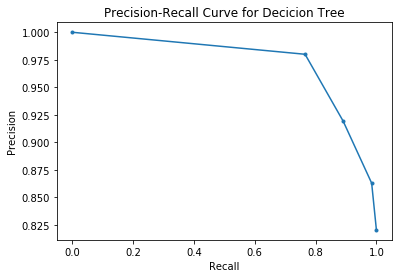

In [9]:
# Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculating precision-recall curve
plt.plot(recall, precision, marker='.') # plotting the precision-recall curve for the model
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve for Decicion Tree');
plt.show()

#### Evaluating performance by cross-validation

In [10]:
scores_tree = cross_val_score(clf_tree, X_train, y_train, cv=10)
print(scores_tree)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

[0.925      0.85       0.975      0.9        0.875      0.95
 0.975      0.925      0.92307692 0.92307692]
Accuracy: 0.92 (+/- 0.08)


#### Optimizing decision tree and detecting (potential) over-fitting

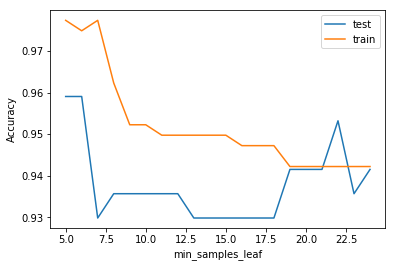

In [11]:
# Optimizing for min_samples_leaf

complexity_values = range(5,25)

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# Plotting results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

The above graoh shows us that the best min_sample_leaf would be around 17.

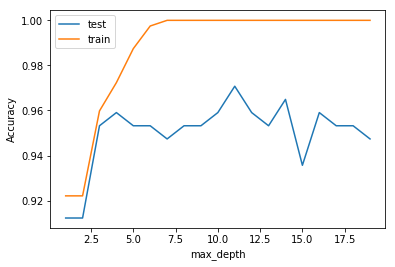

In [12]:
# Optimizing for max_depth

complexity_values = range(1,20)

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# Plotting results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

The above graph shows us that best value for max_depth would be around 3. Hence, we used this value in our final model.

### Model 2: Logistic Classifier

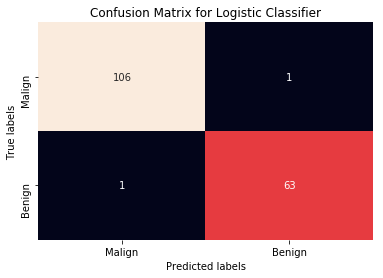

In [13]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

# Performance Measures - 

# I have calculated all the scores here and have printed them at the end of the analysis as a comparison.

accuracy_log = accuracy_score(y_test, y_pred_log) # accuracy

precision_log = precision_score(y_test, y_pred_log, average="macro") # precision

recall_log = recall_score(y_test, y_pred_log, average="macro") # recall

f1_log = f1_score(y_test, y_pred_log, average="macro") # f1

kappa_log = cohen_kappa_score(y_test, y_pred_log) # kappa

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred_log)

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g', cbar = False); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Classifier'); 
ax.xaxis.set_ticklabels(['Malign', 'Benign']); ax.yaxis.set_ticklabels(['Malign', 'Benign']);

Logistic model shows better results than Decision Tree model in this confusion matrix. We will further evaluate these results with ROC curve, Precision-recall curve and and cross-validation.

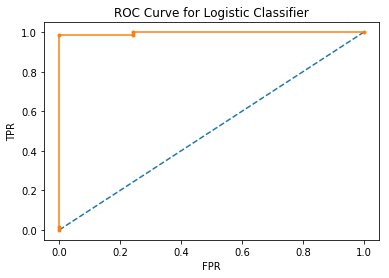

AUC: 0.996


In [14]:
# ROC Curve

probs = clf_log.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # keep probabilities for the positive outcome only
auc = roc_auc_score(y_test, probs) # calculating AUC
fpr, tpr, thresholds = roc_curve(y_test, probs) # calculating roc curve
plt.plot([0, 1], [0, 1], linestyle='--') # plotting no skill (base model)
plt.plot(fpr, tpr, marker='.') # plot the roc curve for the model
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve for Logistic Classifier');
plt.show()
print('AUC: %.3f' % auc)

AUC of 99.6% is in line with our confusion matrix results.

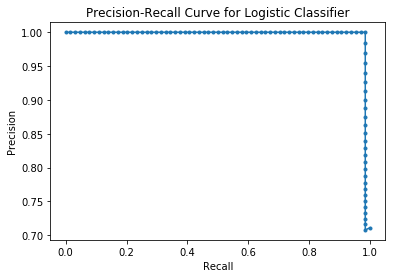

In [15]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculating precision-recall curve
plt.plot(recall, precision, marker='.') # plotting the precision-recall curve for the model
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve for Logistic Classifier');
plt.show()

Precision-Recall curve also backs the high accuracy rates of our Logitic model. We will finally check these numbers with a cross-validated result.

#### Evaluating performance by cross-validation

In [16]:
scores_log = cross_val_score(clf_log, X_train, y_train, cv=10)
print(scores_log)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_tree.std() * 2))

[0.975      0.925      1.         0.975      1.         1.
 0.975      0.925      0.97435897 1.        ]
Accuracy: 0.97 (+/- 0.08)


Cross-validation results show us that the mean accuracy stays around 97%. Hence, we can state that our model accuarcy of 99% does not mean that it is an over-fitted model.

### Model 3: K-Nearest Neighbors Classifier

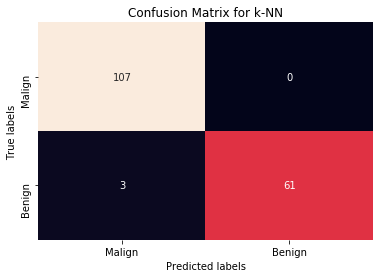

In [17]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

# Performance Measures - 

# I have calculated all the scores here and have printed them at the end of the analysis as a comparison.

accuracy_knn = accuracy_score(y_test, y_pred_knn) # accuracy

precision_knn = precision_score(y_test, y_pred_knn, average="macro") # precision

recall_knn = recall_score(y_test, y_pred_knn, average="macro") # recall

f1_knn = f1_score(y_test, y_pred_knn, average="macro") # f1:

kappa_knn = cohen_kappa_score(y_test, y_pred_knn) # kappa:

# confusion matrix
matrix = confusion_matrix(y_test, y_pred_knn)

ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g', cbar = False); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for k-NN'); 
ax.xaxis.set_ticklabels(['Malign', 'Benign']); ax.yaxis.set_ticklabels(['Malign', 'Benign']);

This model also shows high accuracy but not as high as logistic model.

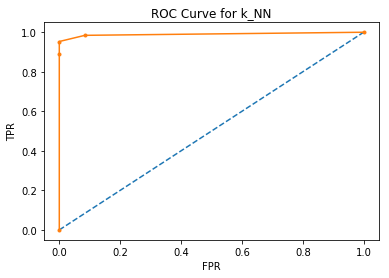

AUC: 0.990


In [18]:
# ROC Curve

probs = clf_knn.predict_proba(X_test) # predicting probabilities
probs = probs[:, 1] # keeping probabilities for the positive outcome only
auc = roc_auc_score(y_test, probs) # calculating AUC
fpr, tpr, thresholds = roc_curve(y_test, probs) # calculating roc curve
plt.plot([0, 1], [0, 1], linestyle='--') # plotting no skill (base model)
plt.plot(fpr, tpr, marker='.') # plotting the roc curve for the model
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve for k_NN');
plt.show()
print('AUC: %.3f' % auc)

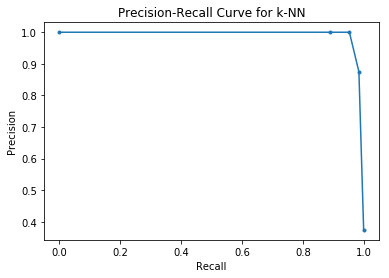

In [19]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculating precision-recall curve
plt.plot(recall, precision, marker='.') # plotting the precision-recall curve for the model
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve for k-NN');
plt.show()

#### Evaluating performance by cross-validation

In [20]:
scores_knn = cross_val_score(clf_knn, X_train, y_train, cv=10)
print(scores_knn)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

[0.95       0.925      1.         0.925      0.925      0.975
 0.975      0.975      0.92307692 1.        ]
Accuracy: 0.96 (+/- 0.06)


#### Optimizing K-NN and detecting (potential) over-fitting

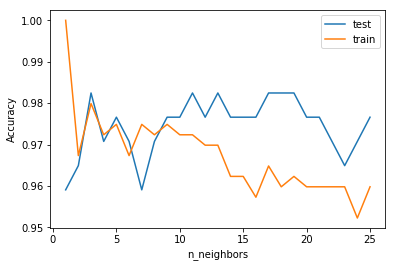

In [21]:
# Optimizing for n_neighbors

complexity_values = range(1,26)

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = KNeighborsClassifier(n_neighbors=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("n_neighbors"); plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

## Comparing Three Models - Decision Tree, K-NN, Logistic

I found that Logistic Regression performs the best among all the three classiers as it has higher performance measures for all the metrics and very low variability in the results.

### 1. On the basis of multiple performance measures -

From below, we can see that Logistic Regression outperforms k-NN and decision tree on all the 5 metrics i.e. f-score, precision, recall, accuracy and kappa score.

In [22]:
d = {'F-Score': [f1_dt, f1_log, f1_knn],
     'Precision': [precision_dt, precision_log, precision_knn],
     'Recall': [recall_dt, recall_log, recall_knn],
     'Accuracy': [accuracy_dt, accuracy_log, accuracy_knn],
     'Kappa Score': [kappa_dt, kappa_log, kappa_knn]}
scores_df = pd.DataFrame(data = d, index = ['Decision Tree', 'Logistic Regression', 'k-Nearest Neighbors'])
scores_df

,F-Score,Precision,Recall,Accuracy,Kappa Score
Decision Tree,0.924603,0.927567,0.921948,0.929825,0.849229
Logistic Regression,0.987515,0.987515,0.987515,0.988304,0.975029
k-Nearest Neighbors,0.981088,0.986364,0.976562,0.982456,0.962188


### 2. On the basis of k-fold validation -

From the below bar-plot of k-fold validated results, we see that Logistic Regression has higher median accuracy and lower variability in the model performance, which makes it the nest among the three. 

LR: 0.949115 (0.021835)
KNN: 0.922804 (0.033158)
DT: 0.906812 (0.032312)


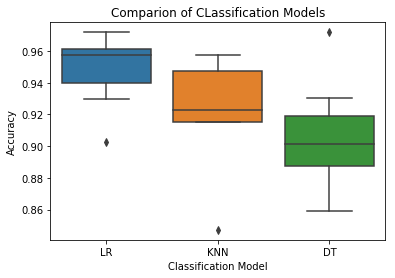

In [24]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=8, random_state=seed)
	cv_results = model_selection.cross_val_score(model, data_X, data_y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

results = list(map(list, zip(*results)))
results = pd.DataFrame(data = results, columns = ['LR', 'KNN', 'DT'])

# # boxplot algorithm comparison
ax= plt.subplot()
ax = sns.boxplot(data=results)
ax.set_title('Comparion of CLassification Models');
ax.set_xlabel('Classification Model');ax.set_ylabel('Accuracy');
